<a href="https://colab.research.google.com/github/ModupalliParimala/Music_Genres_Classification/blob/main/Music_Genres_classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Deep_Learning/Projects/

/content/gdrive/MyDrive/Deep_Learning/Projects


In [ ]:
%tensorflow_version 2.x

In [ ]:
import pandas as pd
import numpy as np
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler,LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.models import Sequential
print(tf.__version__)

2.4.1


# Loading Data from csv file

In [ ]:
audio_data = pd.read_csv('Extracted_features.csv')
audio_data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754759,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149013,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198799,-35.605450,22.153301,-32.489265,10.864513,-23.357929,0.503118,-11.805833,1.206805,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409332,-11.703781,blues


In [ ]:
#Filename column is not required.so dropping it
# Dropping unneccesary columns
audio_data.drop(['filename'],axis=1,inplace=True)
audio_data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,-6.376458,18.618876,-13.697912,15.344631,-12.285267,10.980492,-8.324325,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,2.916037,21.523726,-8.554704,23.358671,-10.103617,11.903744,-5.560388,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,-13.987036,25.754759,-13.649585,11.629271,-11.780589,9.706443,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,1.754462,14.238345,-4.830883,9.297966,-0.757742,8.149013,-3.196314,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198799,-35.605450,22.153301,-32.489265,10.864513,-23.357929,0.503118,-11.805833,1.206805,-13.083821,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409332,-11.703781,blues


In [ ]:
audio_data.shape

(1000, 27)

In [ ]:
audio_data.iloc[:, -1].value_counts()

pop          100
hiphop       100
metal        100
rock         100
reggae       100
country      100
classical    100
jazz         100
blues        100
disco        100
Name: label, dtype: int64

In [ ]:
#encode genres into integers.Each integer represents the specific genre.
genre_list = audio_data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
y = to_categorical(y,num_classes=10)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
y.shape

(1000, 10)

# Normalizing the data

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(audio_data.iloc[:, :-1], dtype = float))

# Splitting dataset into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape,y_train.shape

((800, 26), (800, 10))

In [ ]:
X_test.shape,y_test.shape

((200, 26), (200, 10))

In [ ]:
X_train.shape[1]

26

In [ ]:
#Building ANN(also known as Feed Forward Network)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               13824     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 186,954
Trainable params: 186,954
Non-trainable params: 0
_________________________________________________________________


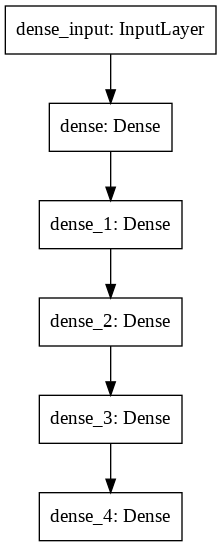

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# if the accuracy does not increase over 10 epochs, reduce the learning rate by half.
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=10, min_lr=0.0001, verbose=1)
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[reduce_lr])

Epoch 1/200
25/25 [==============================] - 1s 31ms/step - loss: 2.0768 - accuracy: 0.2837 - val_loss: 1.4716 - val_accuracy: 0.4500
Epoch 2/200
25/25 [==============================] - 0s 9ms/step - loss: 1.3352 - accuracy: 0.5132 - val_loss: 1.2617 - val_accuracy: 0.5850
Epoch 3/200
25/25 [==============================] - 0s 7ms/step - loss: 1.1161 - accuracy: 0.6092 - val_loss: 1.0776 - val_accuracy: 0.6050
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 0.9733 - accuracy: 0.6383 - val_loss: 1.0859 - val_accuracy: 0.6200
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 0.8015 - accuracy: 0.7482 - val_loss: 1.0183 - val_accuracy: 0.6400
Epoch 6/200
25/25 [==============================] - 0s 7ms/step - loss: 0.7303 - accuracy: 0.7621 - val_loss: 0.9390 - val_accuracy: 0.6950
Epoch 7/200
25/25 [==============================] - 0s 7ms/step - loss: 0.5829 - accuracy: 0.8015 - val_loss: 0.9776 - val_accuracy: 0.6250
Epoch 8/200


In [ ]:
model.save_weights("ANN_weights.h5")

In [ ]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("ANN_model.json", "w") as json_file:
  json_file.write(model_json)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

7/7 [==============================] - 0s 2ms/step - loss: 1.8322 - accuracy: 0.7250
test_acc:  0.7250000238418579


In [ ]:
predictions = model.predict(X_test)
np.argmax(predictions[0])

0

In [ ]:
np.argmax(predictions[99])

8